<h1><center>  DIGITAL IMAGE PROCESSING PROJECT </center></h1>
<center> Yaiza Rubio Chavida, Hugo Cortier, Fidan Rustambayli </center>
<center> University of Tartu </center>

<center>The objective of this idea is to control which people have entered to some place and
at what time they did it. </center>


<center> This program can help to prevent people entering the rooms without belonging to
the company / university. Moreover this also can control people who have been together in some place (special importance due to the COVID-19 pandemic) </center>

<center> </center>

<center> First of all, we wil generate different QR for each person who has access to the place, for that we will ask to the person: the name, date and time.</center> 

In [1]:


class People:
    date = []
    time = []
    duration = []
    def __init__(self,name,lastname,contact,position):
        self.name = name
        self.lastname = lastname
        self.contact = contact
        self.position = position
        
    def addqrimage(self,img,imgfile):
        self.image = img
        self.imgfile = imgfile
        
    
    def adddate(date,time, duration):
        self.date.append(date)
        self.time.append(time)
        self.time.append(duration)
        
    def printdata(self):
        print(self.name)
        print(self.lastname)
        print(self.position)
        for i in range(len(self.date):
            print(self.date[i],self.time,self.duration)
        
    

In [2]:
print("You are going to generate a new QR")
name = input("Introduce your name please: ")
lastname= input("Lastname: ")
contact= input("Email/phone number:")
position = input("Student/teacher/other(specify): ")
newperson = People(name,lastname,contact,position)


You are going to generate a new QR
Introduce your name please: Fidan
Lastname: Rustambayli
Email/phone number:fidan.nonnnn5@gmail.com
Student/teacher/other(specify): student


<center>The program will generate a new QR code and it will be saved as an image. </center>

In [13]:
import qrcode
qr = qrcode.QRCode(version=1, box_size=10,border=5)

qr.add_data("Name:" + name)
qr.add_data("\nLastname:" + lastname)
qr.add_data("\nContact:" + contact)
qr.add_data("\nPosition:" + position)
qr.make(fit=True)

img = qr.make_image(fill='black', back_color='white')
img.save(name + " " + lastname +'.png')
imgfilename = name + " " + lastname +'.png'
newperson.addqrimage(img,imgfilename)

In [14]:
print("Great! You have created a new profile: \nName:" + name, "\nLastname:" + lastname, "\nContact:" + contact , "\nPosition:" + position)

Great! You have created a new profile: 
Name:Fidan 
Lastname:Rustambayli 
Contact:fidan.nonnnn5@gmail.com 
Position:student


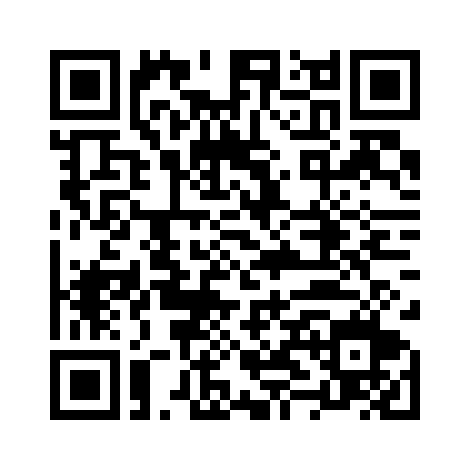

In [15]:
from IPython.display import Image

Image(imgfilename)

<center>Analyze QR and compare it with the existing ones. </center>

In [16]:
import qrcode

# Creat several demo QR codes

for i in range(1,3):
    qr = qrcode.QRCode(version=1, box_size=10,border=5)
    qr.add_data("data:"+str(i) )
    img = qr.make_image(fill='black', back_color='white')
    img.save('demo'+ str(i) +'.png')

In [17]:
#some code
import cv2
import numpy as np

image1 = cv2.imread('demo1.png')
image2 = cv2.imread("demo2.png")

def mse(imageA, imageB):

    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    return err

print('These images are completally different images', mse(image1,image2))
err = mse(image1,image2)

These images are completally different images 18269.250780437043


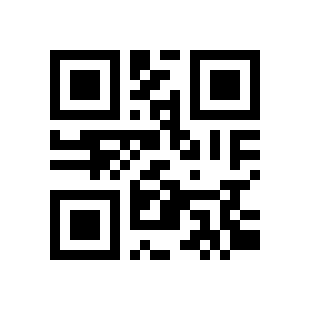

In [18]:
Image('demo2.png')

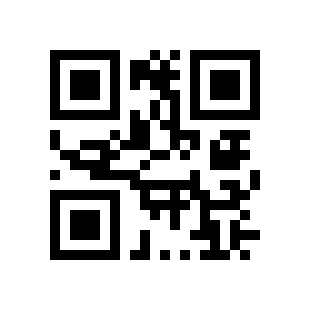

In [19]:
Image('demo1.png')

<center>If the person got the permission to enter, the computer will ask him the date,time and how much time he will be there.</center>

Name:Fidan
Lastname:Rustambayli
Contact:fidan.nonnnn5@gmail.com
Position:student


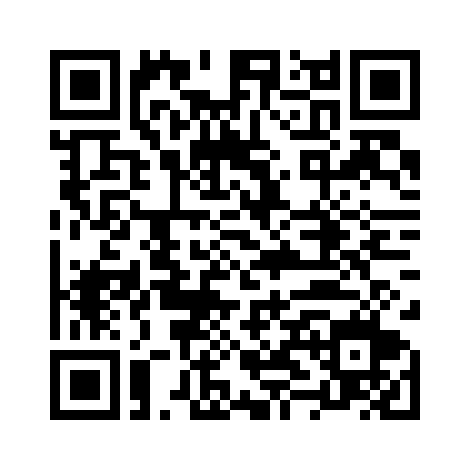

In [20]:
#Decoding qr to get name, lastname, and contact information

from pyzbar.pyzbar import decode
from PIL import Image

img = Image.open('Fidan Rustambayli.png')

result = decode(img)

for i in result:
    print(i.data.decode("utf-8"))
    
img

In [21]:
if err < 100: # 100 is threshold
    print("Great! You have access to this room. Please fill the following data:")
    
    date = input("Date:")
    time = input("Time:")
    
    duration = input("How much time are you going to stay there:")
    print("Thank you")
    
    newperson.adddate(date,time,duration)

In [22]:
newperson.printdata()

Fidan
Rustambayli
student


TypeError: 'int' object is not iterable

In [ ]:
import pandas as pd
access = {'Name': ['name'],'Lastname': ['lastname'], 'Date': ['date'], 'Time': ['time'], 'Duration': ['duration']}
df = pd.DataFrame(access, columns = ['Name', 'Lastname','Date', 'Time', 'Duration'])
add = {'Name': [newperson.name],'Lastname': [newperson.lastname], 'Date': [newperson.date], 'Time': [newperson.time], 'Duration': [newperson.duration]}
df2 = pd.DataFrame(add, columns = ['Name', 'Lastname','Date', 'Time', 'Duration'])
df.append(df2, ignore_index=True)
print (df)

<center>If the person doesn´t have permission to enter.</center>

In [ ]:
if err >= 100:
    print("Sorry. You do not have access to this room.")